In [331]:
import numpy as np
import pandas as pd

In [332]:
data_df=pd.read_csv('kidney_disease.csv')

In [333]:
data_df.shape

(400, 26)

In [334]:
data_df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [335]:
data_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [336]:
data_df.isna().sum()
data_df.drop('id',axis=1,inplace=True)


In [337]:
data_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [338]:
data_df.columns = [
    "Age",
    "Blood Pressure",
    "Specific Gravity",
    "Albumin",
    "Sugar",
    "Red Blood Cells",
    "Pus Cell",
    "Pus Cell Clumps",
    "Bacteria",
    "Blood Glucose Random",
    "Blood Urea",
    "Serum Creatinine",
    "Sodium",
    "Potassium",
    "Hemoglobin",
    "Packed Cell Volume",
    "White Blood Cell Count",
    "Red Blood Cell Count",
    "Hypertension",
    "Diabetes Mellitus",
    "Coronary Artery Disease",
    "Appetite",
    "Pedal Edema",
    "Anemia",
    "Disease Classification"
]


In [339]:
data_df['Diabetes Mellitus'].describe

<bound method NDFrame.describe of 0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: Diabetes Mellitus, Length: 400, dtype: object>

In [340]:
text_columns=["Packed Cell Volume","White Blood Cell Count","Red Blood Cell Count"]
for i in text_columns:
    print(f"{i} :{data_df[i].dtype}")



Packed Cell Volume :object
White Blood Cell Count :object
Red Blood Cell Count :object


In [341]:
def text_to_numneric(data_df,column):
    data_df[column]=pd.to_numeric(data_df[column],errors="coerce")
for column in text_columns:
    text_to_numneric(data_df,column)
    print(f"{column} : {data_df[column].dtype}")

Packed Cell Volume : float64
White Blood Cell Count : float64
Red Blood Cell Count : float64


In [342]:
missing=data_df.isna().sum()
missing[missing>0].sort_values(ascending=False)

Red Blood Cells            152
Red Blood Cell Count       131
White Blood Cell Count     106
Potassium                   88
Sodium                      87
Packed Cell Volume          71
Pus Cell                    65
Hemoglobin                  52
Sugar                       49
Specific Gravity            47
Albumin                     46
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Blood Pressure              12
Age                          9
Bacteria                     4
Pus Cell Clumps              4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
dtype: int64

In [343]:
def fill_with_mean(data_df,column):
    mean=data_df[column].mean()

    data_df.fillna(value=mean,inplace=True)
def fill_with_mode(data_df,column):
    mode=data_df[column]

    data_df.fillna(value=mode,inplace=True)


numeric_columns=[col for col in data_df if data_df[col].dtype != "object"]
object_columns=[col for col in data_df if data_df[col].dtype=="object"]
print(object_columns)


['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Disease Classification']


In [344]:
for column in numeric_columns:
    fill_with_mean(data_df,column)
for column in object_columns:
    fill_with_mode(data_df,column)

In [345]:
missing=data_df.isna().sum()
missing[missing>0].sort_values(ascending=False)

Series([], dtype: int64)

In [346]:
data_df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Disease Classification
0,48.0,80.0,1.020,1.0,0.0,51.483376,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,51.483376,normal,notpresent,notpresent,51.483376,...,38.0,6000.0,51.483376,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,51.483376,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [347]:
data_df.head(3)
data_df['Diabetes Mellitus'].dtype

dtype('O')

In [348]:
print(f"diabetes : {data_df['Diabetes Mellitus'].unique()}")
print(f"Coronary Artery Disease : {data_df['Coronary Artery Disease'].unique()}")
print(f"Disease Classification : {data_df['Disease Classification'].unique()}")

diabetes : ['yes' 'no' ' yes' '\tno' '\tyes' 51.48337595907928]
Coronary Artery Disease : ['no' 'yes' '\tno' 51.48337595907928]
Disease Classification : ['ckd' 'ckd\t' 'notckd']


In [349]:
data_df['Diabetes Mellitus']=data_df['Diabetes Mellitus'].replace(to_replace={' yes':'yes',' \tno':'no','\tyes':'yes', 51.48337595907928:''})
data_df['Coronary Artery Disease']=data_df['Coronary Artery Disease'].replace(to_replace={'\tno':'no',51.48337595907928:''})
data_df['Disease Classification']=data_df['Disease Classification'].replace(to_replace={'ckd\t':'ckd'})


In [350]:
print(f"diabetes : {data_df['Diabetes Mellitus'].unique()}")
print(f"Coronary Artery Disease : {data_df['Coronary Artery Disease'].unique()}")
print(f"Disease Classification : {data_df['Disease Classification'].unique()}")

diabetes : ['yes' 'no' '\tno' '']
Coronary Artery Disease : ['no' 'yes' '']
Disease Classification : ['ckd' 'notckd']


In [351]:
data_df['Disease Classification']=data_df['Disease Classification'].map({'ckd':1,'notckd':0})
data_df['Red Blood Cell Count']=data_df['Red Blood Cell Count'].map({'normal':1,'abnormal':0})
data_df['Pus Cell']=data_df['Pus Cell'].map({'normal':1,'abnormal':0})
data_df['Pus Cell Clumps']=data_df['Pus Cell Clumps'].map({'present':1,'notpresent':0})
data_df['Bacteria']=data_df['Bacteria'].map({'present':1,'notpresent':0})
data_df['Hypertension']=data_df['Hypertension'].map({'yes':1,'no':0})
data_df['Diabetes Mellitus']=data_df['Diabetes Mellitus'].map({'yes':1,'no':0})
data_df['Coronary Artery Disease']=data_df['Coronary Artery Disease'].map({'yes':1,'no':0})
data_df['Appetite']=data_df['Appetite'].map({'good':1,'poor':0})
data_df['Pedal Edema']=data_df['Pedal Edema'].map({'yes':1,'no':0})
data_df['Anemia']=data_df['Anemia'].map({'yes':1,'no':0})

In [352]:
data_df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Disease Classification
0,48.0,80.0,1.020,1.0,0.0,51.483376,1.0,0.0,0.0,121.000000,...,44.0,7800.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,51.483376,1.0,0.0,0.0,51.483376,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,normal,1.0,0.0,0.0,423.000000,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,normal,0.0,1.0,0.0,117.000000,...,32.0,6700.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,normal,1.0,0.0,0.0,106.000000,...,35.0,7300.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1


In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    object 
 6   Pus Cell                 335 non-null    float64
 7   Pus Cell Clumps          396 non-null    float64
 8   Bacteria                 396 non-null    float64
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

In [354]:
data_df['Red Blood Cells'].drop

<bound method Series.drop of 0      51.483376
1      51.483376
2         normal
3         normal
4         normal
         ...    
395       normal
396       normal
397       normal
398       normal
399       normal
Name: Red Blood Cells, Length: 400, dtype: object>

In [355]:
data_df.columns

Index(['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
       'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed Cell Volume',
       'White Blood Cell Count', 'Red Blood Cell Count', 'Hypertension',
       'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite',
       'Pedal Edema', 'Anemia', 'Disease Classification'],
      dtype='object')

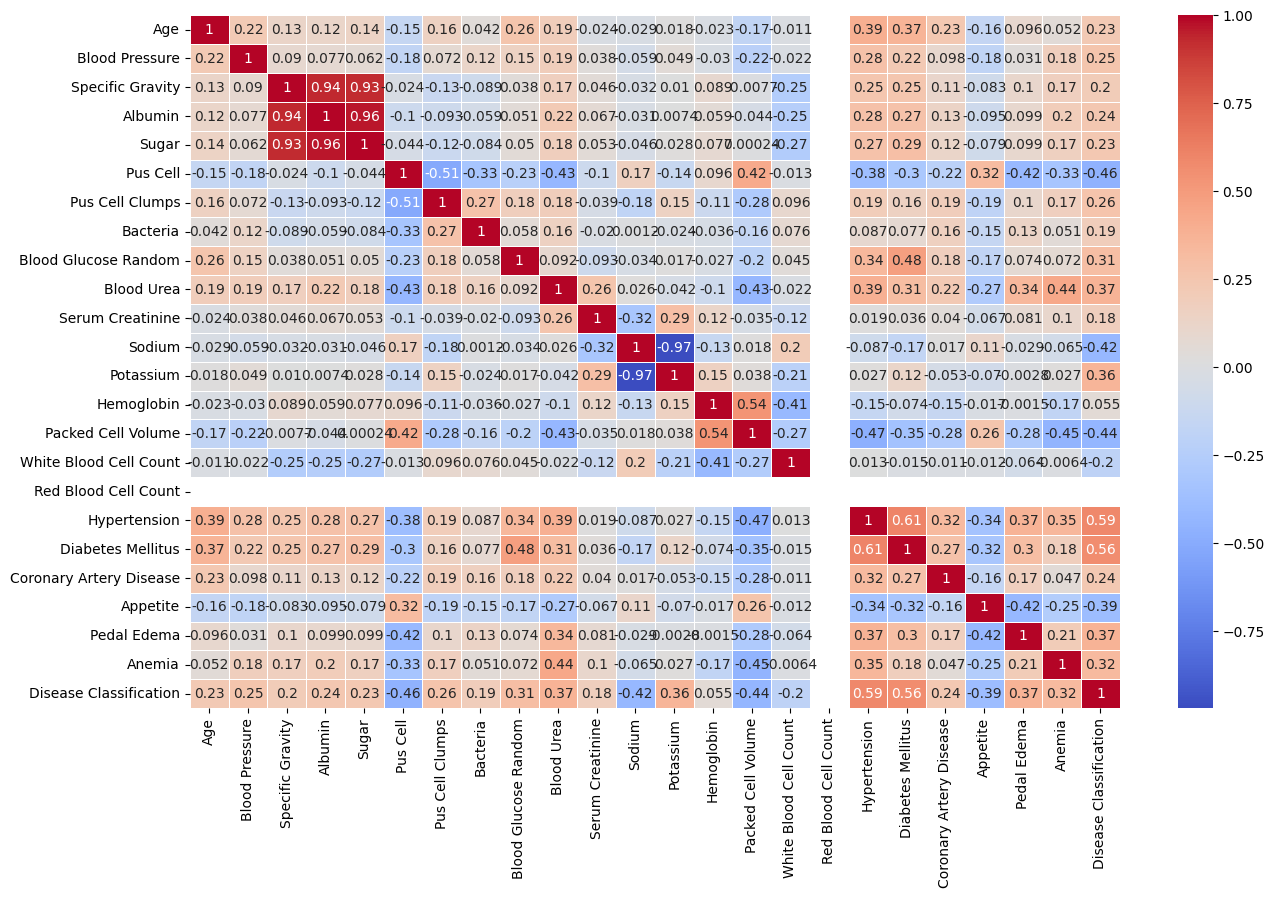

In [356]:
numeric_df = data_df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 9))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    linewidths=0.5,
    cmap="coolwarm"
)
plt.show()



In [357]:
numeric_df = data_df.select_dtypes(include=['number'])

target_corr = numeric_df.corr()['Disease Classification'].abs().sort_values(ascending=False)[1:]
target_corr


Hypertension               0.588820
Diabetes Mellitus          0.564070
Pus Cell                   0.461812
Packed Cell Volume         0.438343
Sodium                     0.420560
Appetite                   0.392645
Pedal Edema                0.374480
Blood Urea                 0.371209
Potassium                  0.356475
Anemia                     0.324787
Blood Glucose Random       0.307108
Pus Cell Clumps            0.263226
Blood Pressure             0.254193
Albumin                    0.244825
Coronary Artery Disease    0.235153
Sugar                      0.230372
Age                        0.225405
Specific Gravity           0.202229
White Blood Cell Count     0.200541
Bacteria                   0.185345
Serum Creatinine           0.177015
Hemoglobin                 0.055049
Red Blood Cell Count            NaN
Name: Disease Classification, dtype: float64

In [358]:
data_df['Disease Classification'].value_counts()

Disease Classification
1    250
0    150
Name: count, dtype: int64

In [359]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in data_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_df[col] = le.fit_transform(data_df[col].astype(str))
    label_encoders[col] = le

In [360]:
x=data_df.drop('Disease Classification',axis=1)
y=data_df['Disease Classification']

In [361]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=86)

In [362]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()


dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [364]:
y_pred=dct.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)